In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [9]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [10]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [11]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [12]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [13]:
#Dropping the features which are not important to build our model
df2 = df.drop(['society','balcony','availability'],axis='columns')

In [14]:
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [15]:
df2.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [16]:
df2.head(3)

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00


In [17]:
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [18]:
median = df2['bath'].median()
df3 = df2.fillna({'bath': median })
df3.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [19]:
df3.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [20]:
df3 = df3.dropna()

In [21]:
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [22]:
df3.shape

(13303, 6)

In [23]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Feature Engineering

In size feature there are some values which are showing BHK some are showing bedroom. So we will create a new feature called as BHK which will have only numerical values.

In [24]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [25]:
df3['bhk']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13303, dtype: int64

In [26]:
df3.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [27]:
df3 = df3.drop(['size'], axis = 'columns')
df3.head

<bound method NDFrame.head of                   area_type                  location total_sqft  bath  \
0      Super built-up  Area  Electronic City Phase II       1056   2.0   
1                Plot  Area          Chikka Tirupathi       2600   5.0   
2            Built-up  Area               Uttarahalli       1440   2.0   
3      Super built-up  Area        Lingadheeranahalli       1521   3.0   
4      Super built-up  Area                  Kothanur       1200   2.0   
...                     ...                       ...        ...   ...   
13315        Built-up  Area                Whitefield       3453   4.0   
13316  Super built-up  Area             Richards Town       3600   5.0   
13317        Built-up  Area     Raja Rajeshwari Nagar       1141   2.0   
13318  Super built-up  Area           Padmanabhanagar       4689   4.0   
13319  Super built-up  Area              Doddathoguru        550   1.0   

        price  bhk  
0       39.07    2  
1      120.00    4  
2       62.00    3

In [28]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [29]:
df3[df3.bhk>20]

,area_type,location,total_sqft,bath,price,bhk
1718,Super built-up Area,2Electronic City Phase II,8000,27.0,230.0,27
4684,Plot Area,Munnekollal,2400,40.0,660.0,43


In [30]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [31]:
def make_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [32]:
df3[~df3['total_sqft'].apply(make_float)]

,area_type,location,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,186.000,4
56,Built-up Area,Devanahalli,3010 - 3410,2.0,192.000,4
81,Built-up Area,Hennur Road,2957 - 3450,2.0,224.500,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
12990,Super built-up Area,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Harlur,1200 - 1470,2.0,72.760,2
13240,Super built-up Area,Devanahalli,1020 - 1130,2.0,52.570,1
13265,Super built-up Area,Hoodi,1133 - 1384,2.0,59.135,2


In [33]:
def convert_sqft_range_to_num(x):
    num = x.split('-')
    if len(num) == 2:
        return (float(num[0])+float(num[1]))/2
    try:
        return float(x)
    except:
        return None

In [34]:
convert_sqft_range_to_num('1234-1235')

1234.5

In [35]:
df4 = df3.copy()
df4['total_sqft'] = df4.total_sqft.apply(convert_sqft_range_to_num)

In [36]:
df4.head()

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2


In [37]:
df4.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
total_sqft                  2475.0
bath                           4.0
price                        186.0
bhk                              4
Name: 30, dtype: object

In [38]:
df4.loc[56]

area_type     Built-up  Area
location         Devanahalli
total_sqft            3210.0
bath                     2.0
price                  192.0
bhk                        4
Name: 56, dtype: object

In [39]:
df4.loc[12990]

area_type     Super built-up  Area
location            Talaghattapura
total_sqft                  2038.5
bath                           3.0
price                        122.0
bhk                              3
Name: 12990, dtype: object

In [40]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [41]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [42]:
df5

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Super built-up Area,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [43]:
df5.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13257.000000,13303.000000,13303.000000,13303.000000,1.325700e+04
mean,1558.809175,2.689619,112.584033,2.803728,7.912825e+03
std,1238.478935,1.339393,148.993820,1.295022,1.064976e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.271186e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438596e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.313318e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [44]:
df5.isnull().sum()

area_type          0
location           0
total_sqft        46
bath               0
price              0
bhk                0
price_per_sqft    46
dtype: int64

In [45]:
df5 = df5.dropna()

In [46]:
df5.isnull().sum()

area_type         0
location          0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [47]:
len(df5.location.unique())

1298

In [48]:
df5.location = df5.location.apply(lambda x: x.strip())

c:\users\jaiswal\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [49]:
location_stats = df5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1287, dtype: int64

In [50]:
df5['location'].value_counts(ascending=False)

Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [51]:
location_stats.values.sum()

13257

In [52]:
len(location_stats[location_stats>10])

240

In [53]:
len(location_stats[location_stats<=10])

1047

In [54]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10.value_counts(ascending=False)

1     471
2     169
3     132
4      75
5      56
7      38
6      37
8      35
9      20
10     14
Name: location, dtype: int64

In [55]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x)

In [56]:
len(df5.location.unique())

241

In [57]:
df5

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Super built-up Area,other,3600.0,5.0,400.00,4,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [58]:
df5['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13257, dtype: object

In [59]:
df5.shape

(13257, 7)

In [60]:
df5[df5.total_sqft/df5.bhk<300]   #Outlier Removal


,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Plot Area,other,1400.0,7.0,218.0,7,15571.428571
13279,Plot Area,other,1200.0,5.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [61]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12513, 7)

In [62]:
df6.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [63]:
def remove_outliers(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))]
        df_output = pd.concat([df_output,reduced_df],ignore_index=True)
    return df_output
df7 = remove_outliers(df6)
df7.shape

(10288, 7)

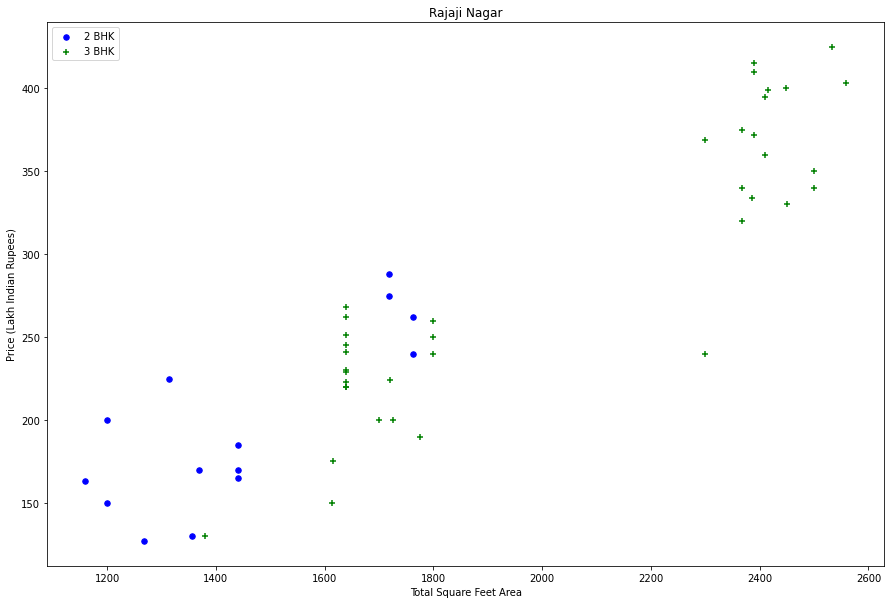

In [64]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=30)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=30)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

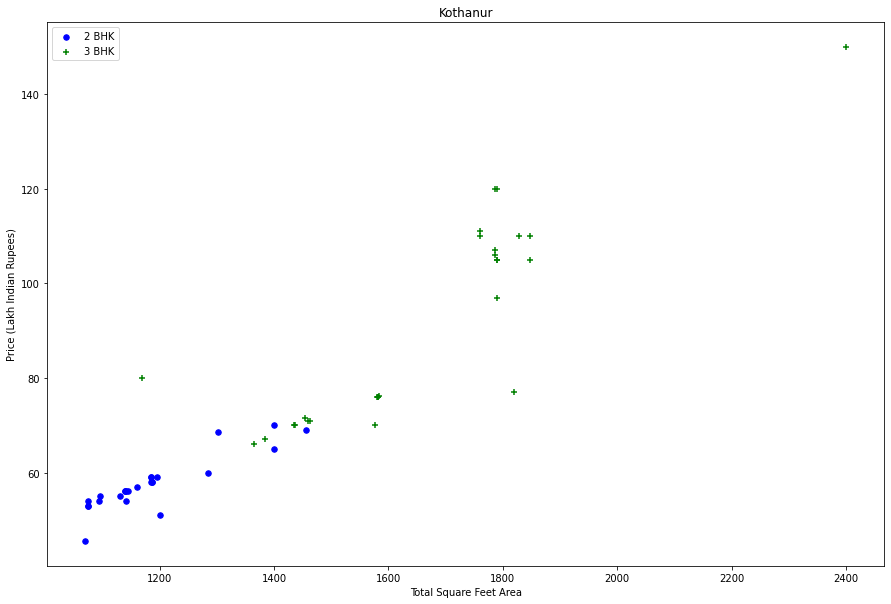

In [65]:
plot_scatter_chart(df7,"Kothanur")

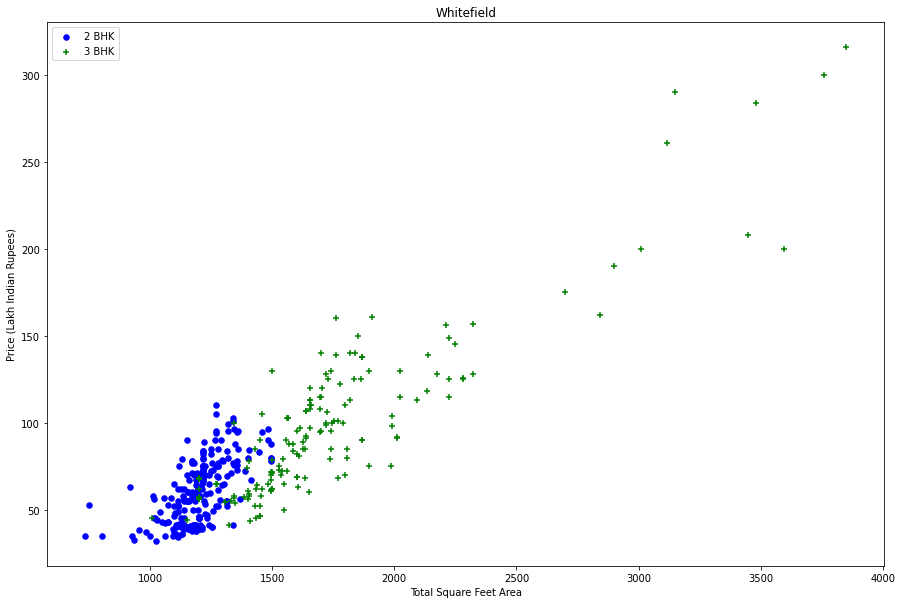

In [66]:
plot_scatter_chart(df7,"Whitefield") 

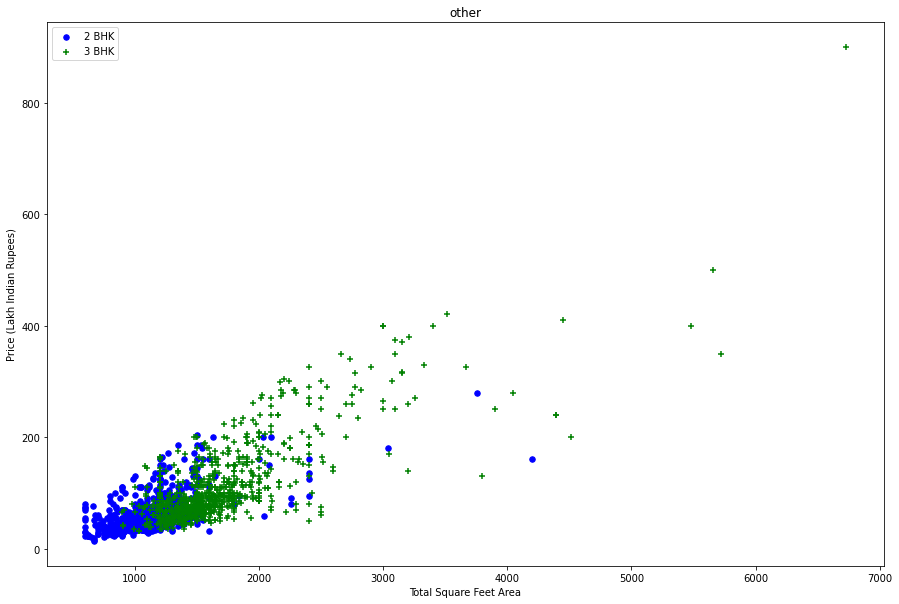

In [67]:
plot_scatter_chart(df7,'other')

In [68]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7342, 7)

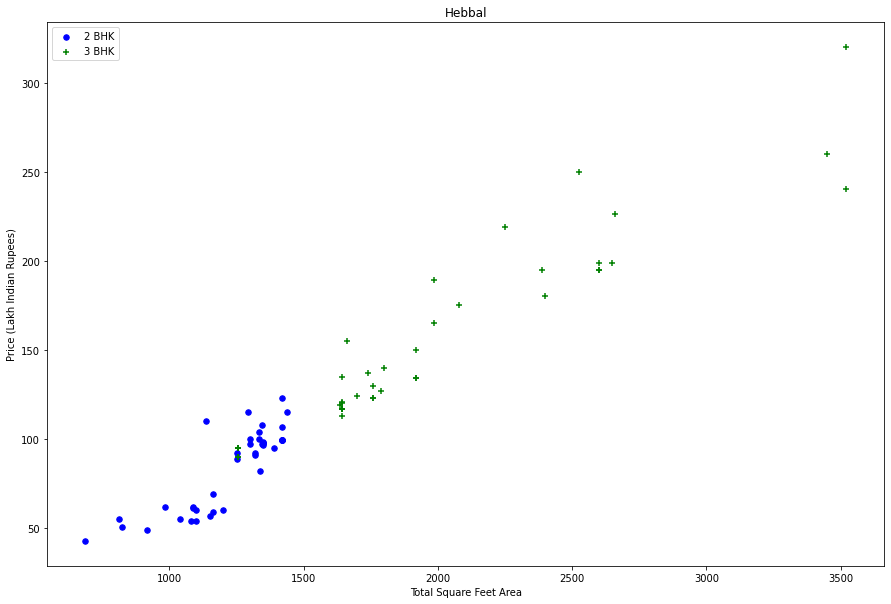

In [69]:
plot_scatter_chart(df8,"Hebbal")

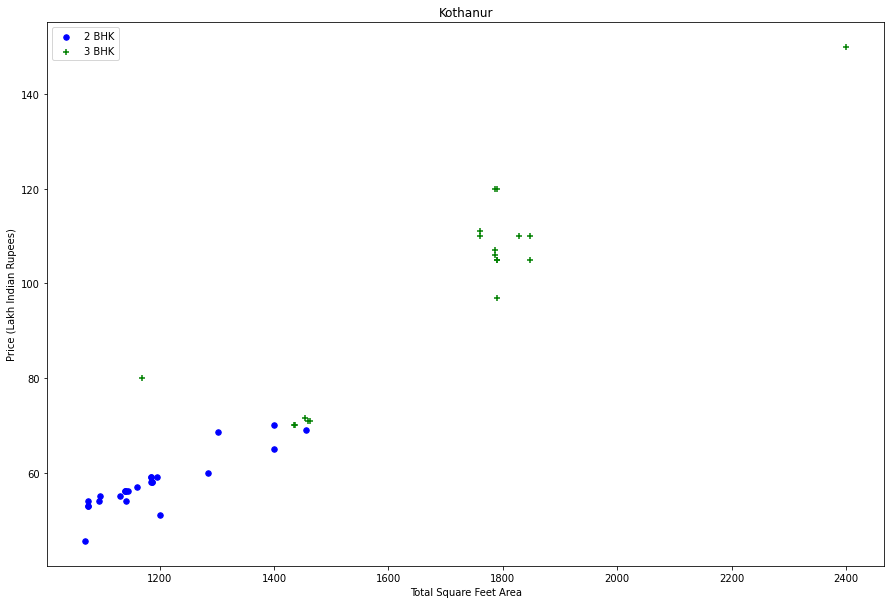

In [70]:
plot_scatter_chart(df8,"Kothanur")

Text(0, 0.5, 'Count')

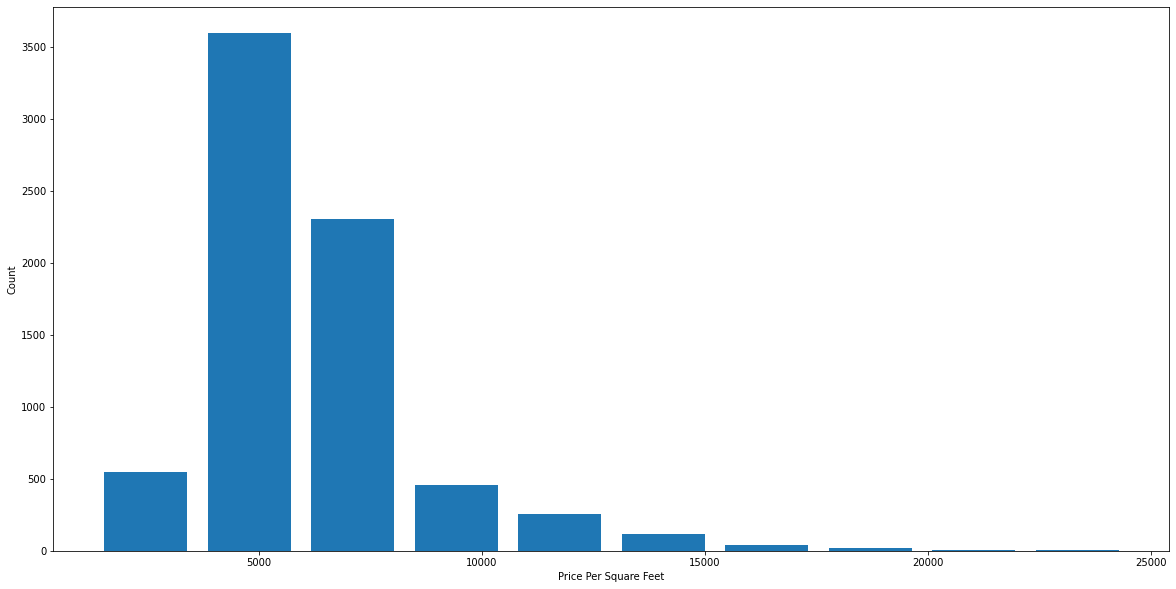

In [71]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [72]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

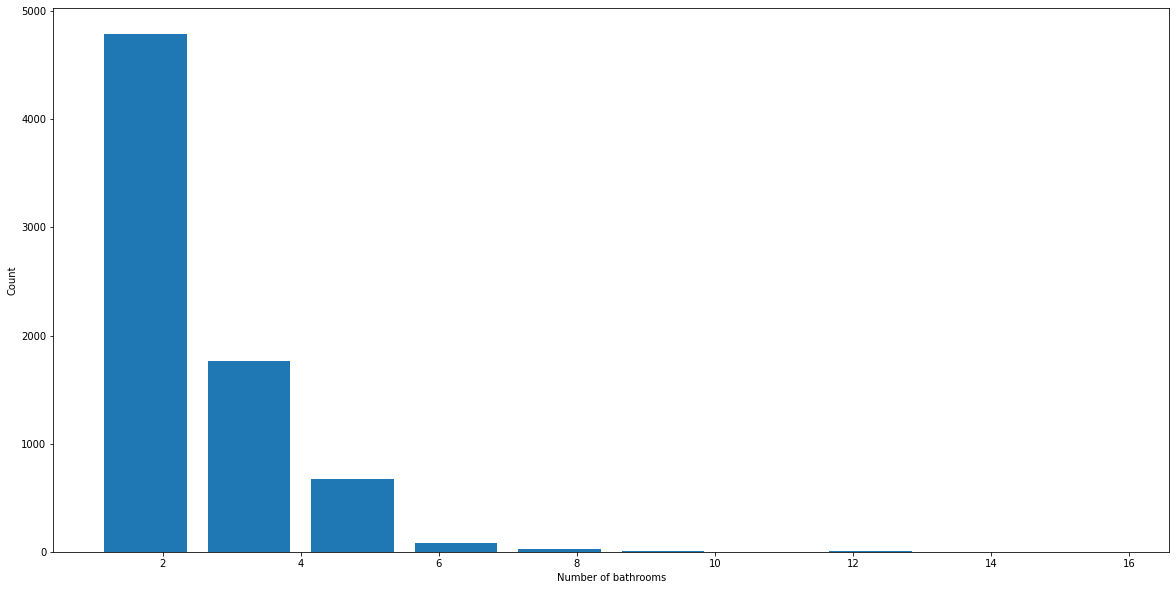

In [73]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [74]:
df8[df8.bath>10]

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
5306,Super built-up Area,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8527,Super built-up Area,other,12000.0,12.0,525.0,10,4375.000000
8616,Super built-up Area,other,10000.0,16.0,550.0,16,5500.000000
9351,Super built-up Area,other,6000.0,12.0,150.0,11,2500.000000
9682,Super built-up Area,other,5425.0,13.0,275.0,13,5069.124424


In [75]:
df8[df8.bath>df8.bhk+2]

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
1634,Built-up Area,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5267,Built-up Area,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6748,Super built-up Area,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8452,Super built-up Area,other,11338.0,9.0,1000.0,6,8819.897689


In [76]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7264, 7)

In [77]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head()


,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2


In [78]:
dummies1 = pd.get_dummies(df10.location)
dummies1.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
dummies2 = pd.get_dummies(df10.area_type)
dummies2.head(3)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1


In [106]:
df11 = pd.concat([df10,dummies1.drop('other',axis='columns')],axis='columns')
df11.head()

,area_type,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df12 = df11.drop(['location','area_type'],axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
df12.shape

(7264, 244)

In [110]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X.shape

(7264, 243)

In [113]:
y = df12.price
y.head(5)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

## Model Building

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [126]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8581823360814852

In [128]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

score = cross_val_score(LinearRegression(), X, y, cv=cv)

In [129]:
score

array([0.80800523, 0.77206975, 0.84432393, 0.84201188, 0.82939234])

In [130]:
score.mean()

0.8191606256800796

In [132]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor()
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

0.7867197148260426

In [137]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv2 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

score2 = cross_val_score(DecisionTreeRegressor(), X, y, cv=cv2)

In [138]:
score2

array([0.57996363, 0.65790716, 0.56928299, 0.76708268, 0.73834316])

In [139]:
score2.mean()

0.6625159227342162

In [144]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [140]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [143]:
predict_price('Hebbal',1000, 2, 2)

72.63984535131956

In [148]:
predict_price('Indira Nagar',1000, 2, 4)

184.68872645256133

In [149]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

87.61625225433939

In [152]:
predict_price('Vijayanagar',1000, 3, 3)

63.61605656474735

In [153]:
import pickle
with open('house_price_prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)